
# Conjunto de ejercicios

Las siguiente funciones fueron utilizados en el siguiente informe, que son propiedad del docente.


In [2]:

from typing import Callable


# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


In [3]:

import math
import numpy as np


def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / math.factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


In [4]:

import matplotlib.pyplot as plt

def graficadora(ts, ys):
    plt.plot(ts, ys, marker = "o", linestyle = "-", label = "y'")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title("Solución de la EDO")
    plt.legend()
    plt.show()



## Ejercicio 3

Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial. 



### Literal a)

$y' = \frac{y}{t} - (\frac{y}{t})^2$, $1 \le t \le 2$, $y(1) = 1$, con $h = 0.1$.


El valor de h es: 0.1


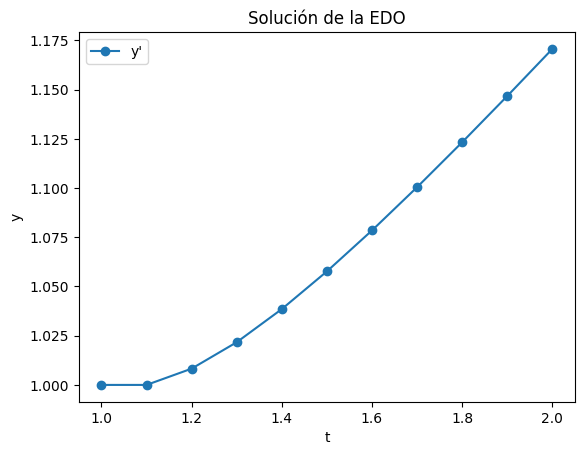

In [ ]:

y_der = lambda t, y: y/t - (y/t)**2
y_init = 1

ys2a, ts2a, h = ODE_euler(a = 1, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2a, ys2a)



### Literal b)

$y' = 1 + \frac{y}{t} + (\frac{y}{t})^2$, $1 \le t \le 3$, $y(1) = 0$, con $h = 0.2$.


El valor de h es: 0.2


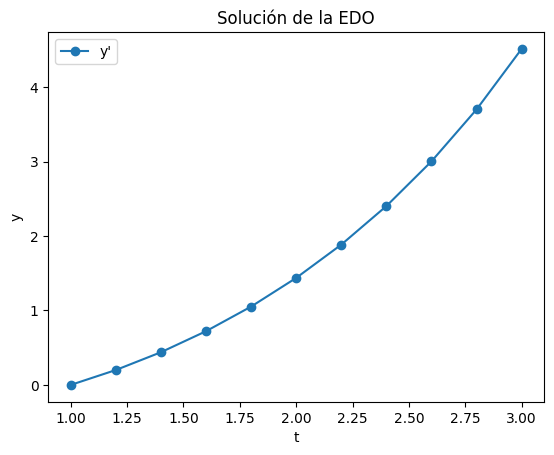

In [ ]:

y_der = lambda t, y: 1 + y/t + (y/t)**2
y_init = 0

ys2b, ts2b, h = ODE_euler(a = 1, b = 3, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2b, ys2b)



### Literal c)

$y' = -(y + 1)(y + 3)$, $0 \le t \le 2$, $y(0) = -2$, con $h = 0.2$.


El valor de h es: 0.2


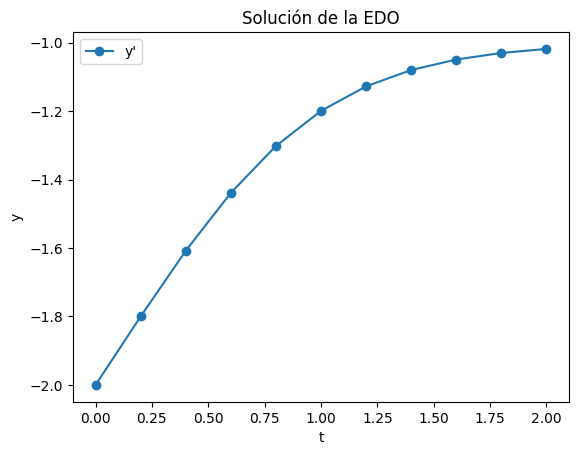

In [ ]:

y_der = lambda t, y: -(y + 1)*(y + 3)
y_init = -2

ys2c, ts2c, h = ODE_euler(a = 0, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2c, ys2c)



### Literal d)

$y' = -5y + 5t^2 + 2t$, $0 \le t \le 1$, $y(0) = \frac{1}{3}$, con $h = 0.1$.


El valor de h es: 0.1


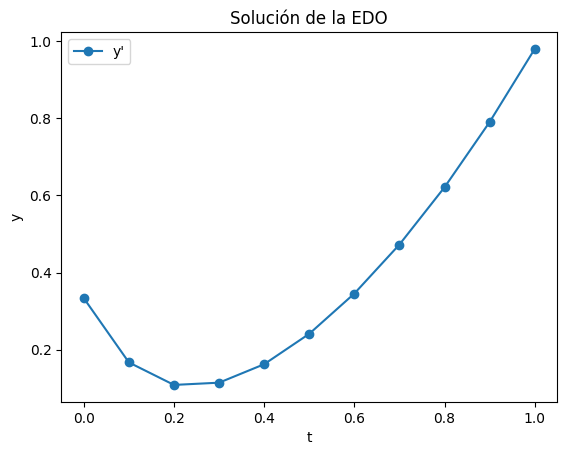

In [ ]:

y_der = lambda t, y: -5*y + 5*t**2 + 2*t
y_init = 1/3

ys2d, ts2d, h = ODE_euler(a = 0, b = 1, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
graficadora(ts2d, ys2d)



## Ejercicio 4

Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las 
aproximaciones del ejercicio 3. 



### Literal a)

$y(t) = \frac{t}{1 + \ln{t}}$


In [ ]:

def y1(t):
    return t/(1 + math.log(t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2a, ts2a)])
print(f"El error real es: {errorReal}")


El error real es: 0.4648864321966765



### Literal b)

$y(t) = t \tan{\ln{t}}$


In [ ]:

def y2(t):
    return t*math.tan(math.log(t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2b, ts2b)])
print(f"El error real es: {errorReal}")



El error real es: 0.6770354966215661



### Literal c)

$y(t) = - 3 + \frac{2}{1 + e^{-2t}}$


In [ ]:

def y3(t):
    return - 3 + 2/(1 + math.exp(-2*t))

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2c, ts2c)])
print(f"El error real es: {errorReal}")


El error real es: 4.114105415722753



### Literal d)

$y(t) = t^2 + \frac{1}{3} e^{-5t}$


In [ ]:

def y4(t):
    return t**2 + (1/3)*math.exp(-5*t)

errorReal = np.mean([abs(y(t) - y_aprox) / abs(y(t)) for y_aprox, t in zip(ys2d, ts2d)])
print(f"El error real es: {errorReal}")


El error real es: 0.1290954106813849



## Ejercicio 5

Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de 𝑦(𝑡). Compare 
las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio 
4.



### Literal a)

$y(0.25)$ y $y(0.93)$.


In [ ]:

res = y1(0.25)
print(res)

res = y1(0.93)
print(res)


-0.6471748623905226
1.0027718477462106



### Literal b)

$y(1.25)$ y $y(1.93)$.


In [ ]:

res = y2(1.25)
print(res)

res = y2(1.93)
print(res)


0.2836531261952289
1.4902277738186658



### Literal c)

$y(2.10)$ y $y(2.75)$.


In [ ]:

res = y3(2.1)
print(res)

res = y3(2.75)
print(res)


-1.0295480633865461
-1.008140275431792



### Literal d)

$y(0.54)$ y $y(0.94)$.


In [ ]:

res = y4(0.54)
print(res)

res = y4(0.94)
print(res)


0.3140018375799166
0.8866317590338986
